## Analiza brezposelnosti in prostih delovnih mest v Sloveniji

Naložimo podatke. Tip podatkov = px. To storimo z pomočjo knjižnice pyaxis. Za sam projekt, bomo uporabljali še pandas in matplotlib, zato importamo še ta dva. Podatke potem obdelamo z pyaxis.parse in podamo še encoding. Utf-8 ni delal, latin1 ni primeren za naše podatke, zato sem se na koncu odločil za cp1250. 

In [107]:
from pyaxis import pyaxis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
# nalozimo podatke
parsed = pyaxis.parse('podatki/brezaposleneCetrtletno.PX', encoding='cp1250') 
df = parsed['DATA']

Multilingual PX file


Za prikaz razlik med nezaposlenostjo moških in žensk potrebujemo prvo ustrezne podatke. Izberemo regijo Slovenija, skupno starostno skupino, meritev v procentih in spol. Podatke dobimo razdeljene glede na četrtine let podane v formatu 2008Q1 naprimer. Iz tega razloga jih potem pretvorimo v berljivo obliko z PeriodIndex. Za vsak slučaj se prepričamo, da nimamo string podatkov in na koncu izrišemo graf. 

Multilingual PX file


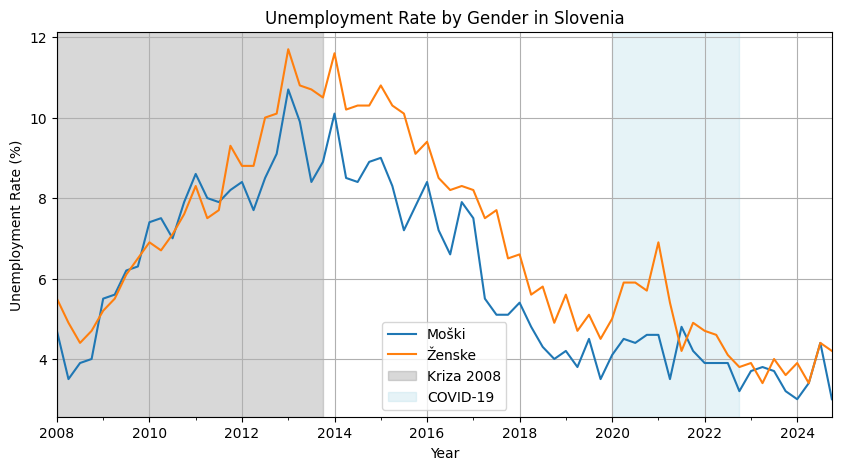

In [109]:
parsed2 = pyaxis.parse('podatki/vsi.px', encoding='cp1250')
df2 = parsed2['DATA']

df2_unemployment = df2[
    (df2['KOHEZIJSKA REGIJA'] == "SLOVENIJA") &
    (df2["STAROSTNA SKUPINA"] == "Starostna skupina - SKUPAJ") &
    (df2["MERITVE"] == "Stopnja brezposelnosti (v %)") &
    (df2["SPOL"].isin(['Moški', 'Ženske']))
].copy()

df2_unemployment['ČETRTLETJE'] = pd.PeriodIndex(df2_unemployment['ČETRTLETJE'], freq='Q').to_timestamp()
df2_unemployment['DATA'] = pd.to_numeric(df2_unemployment['DATA'], errors='coerce')

pivot = df2_unemployment.pivot_table(index='ČETRTLETJE', columns='SPOL', values='DATA')


# pivot.plot(title='Unemployment Rate by Gender in Slovenia', figsize=(10, 5))
# plt.ylabel('Unemployment Rate (%)')
# plt.xlabel('Year')
# plt.grid(True)
# plt.show()

pivot.plot(title='Unemployment Rate by Gender in Slovenia', figsize=(10, 5))

# Obarvajmo obdobja
plt.axvspan('2008-01-01', '2013-12-31', color='gray', alpha=0.3, label='Kriza 2008')
plt.axvspan('2020-01-01', '2022-12-31', color='lightblue', alpha=0.3, label='COVID-19')

plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')
plt.grid(True)

# Dodajmo legendo
plt.legend()

plt.show()

Dobljeni rezulati, se zdijo smiselni glede na krizo, ki se je zgodila okoli leta 2010 in manjša porast brezposelnosti
okoli leta 2020 - 2022 sklepam, da zaradi covida. 

In [110]:
parsed3 = pyaxis.parse('podatki/kohezijske.px', encoding='cp1250')
df3 = parsed3['DATA']

Multilingual PX file


In [111]:
df.columns

Index(['KOHEZIJSKA REGIJA', 'BREZPOSELNE OSEBE', 'SPOL', 'MERITVE',
       'ČETRTLETJE', 'DATA'],
      dtype='object')

Povprečno število brezposelnih med leti 2008-2024 v Zahodni Sloveniji (mera: število v 1000): 
SPOL
Spol - SKUPAJ    27.367647
dtype: float64
Povprečno število brezposelnih med leti 2008-2024 v Vzhodni Sloveniji (mera: število v 1000): 
SPOL
Spol - SKUPAJ    38.044118
dtype: float64


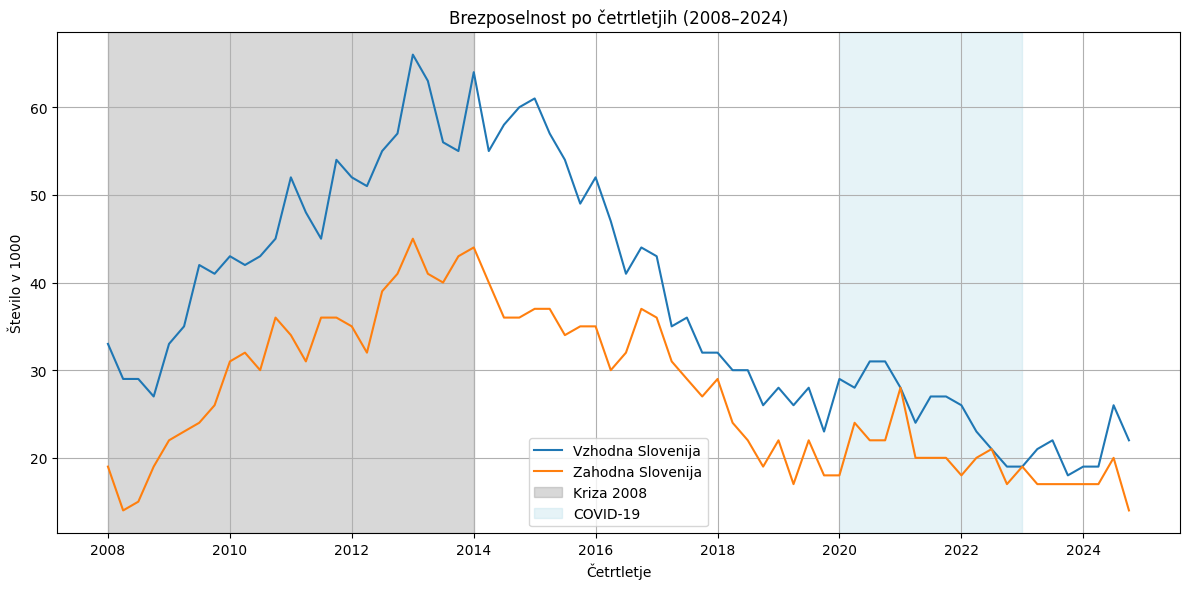

In [122]:
df_vzhod = df[
        (df['KOHEZIJSKA REGIJA'] == 'Vzhodna Slovenija') &
        (df['BREZPOSELNE OSEBE'] == 'Brezposelni - SKUPAJ') &
        (df['MERITVE'] == 'Število v 1000') &
        (df['SPOL'] == 'Spol - SKUPAJ')

].copy()

df_vzhod['ČETRTLETJE'] = pd.PeriodIndex(df_vzhod['ČETRTLETJE'], freq='Q').to_timestamp()
df_vzhod['DATA'] = pd.to_numeric(df_vzhod['DATA'], errors='coerce')
pivot_vzhod = df_vzhod.pivot_table(index='ČETRTLETJE', columns='SPOL', values='DATA')



df_zahod = df[
        (df['KOHEZIJSKA REGIJA'] == 'Zahodna Slovenija') &
        (df['BREZPOSELNE OSEBE'] == 'Brezposelni - SKUPAJ') &
        (df['MERITVE'] == 'Število v 1000') &
        (df['SPOL'] == 'Spol - SKUPAJ')
].copy()

df_zahod['ČETRTLETJE'] = pd.PeriodIndex(df_zahod['ČETRTLETJE'], freq='Q').to_timestamp()
df_zahod['DATA'] = pd.to_numeric(df_zahod['DATA'], errors='coerce')
pivot_zahod = df_zahod.pivot_table(index='ČETRTLETJE', columns='SPOL', values='DATA')

print("Povprečno število brezposelnih med leti 2008-2024 v Zahodni Sloveniji (mera: število v 1000): ")
print(pivot_zahod.mean())

print("Povprečno število brezposelnih med leti 2008-2024 v Vzhodni Sloveniji (mera: število v 1000): ")
print(pivot_vzhod.mean())

plt.figure(figsize=(12, 6))

plt.plot(pivot_vzhod.index, pivot_vzhod, label='Vzhodna Slovenija')
plt.plot(pivot_zahod.index, pivot_zahod, label='Zahodna Slovenija')
plt.title('Brezposelnost po četrtletjih (2008–2024)')
plt.ylabel('Število v 1000')
plt.xlabel('Četrtletje')
plt.axvspan('2008-01-01', '2013-12-31', color='gray', alpha=0.3, label='Kriza 2008')
plt.axvspan('2020-01-01', '2022-12-31', color='lightblue', alpha=0.3, label='COVID-19')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 


In [113]:
print(df.head())

  KOHEZIJSKA REGIJA     BREZPOSELNE OSEBE           SPOL         MERITVE  \
0         SLOVENIJA  Brezposelni - SKUPAJ  Spol - SKUPAJ  Število v 1000   
1         SLOVENIJA  Brezposelni - SKUPAJ  Spol - SKUPAJ  Število v 1000   
2         SLOVENIJA  Brezposelni - SKUPAJ  Spol - SKUPAJ  Število v 1000   
3         SLOVENIJA  Brezposelni - SKUPAJ  Spol - SKUPAJ  Število v 1000   
4         SLOVENIJA  Brezposelni - SKUPAJ  Spol - SKUPAJ  Število v 1000   

  ČETRTLETJE DATA  
0     2008Q1   52  
1     2008Q2   43  
2     2008Q3   44  
3     2008Q4   45  
4     2009Q1   55  


Sedaj bi si pogledali še število prostih mest v teh obdobjih. Je število prostih delovnih mest skladno z ravnjo brezposelnosti ? Kje je kje ni ? 

In [115]:
# nalozimo podatke
parsed_delovnamesta = pyaxis.parse('podatki/delovnaMestaCetrtletno.PX', encoding='cp1250') 
delovna_df = parsed_delovnamesta['DATA']

Multilingual PX file


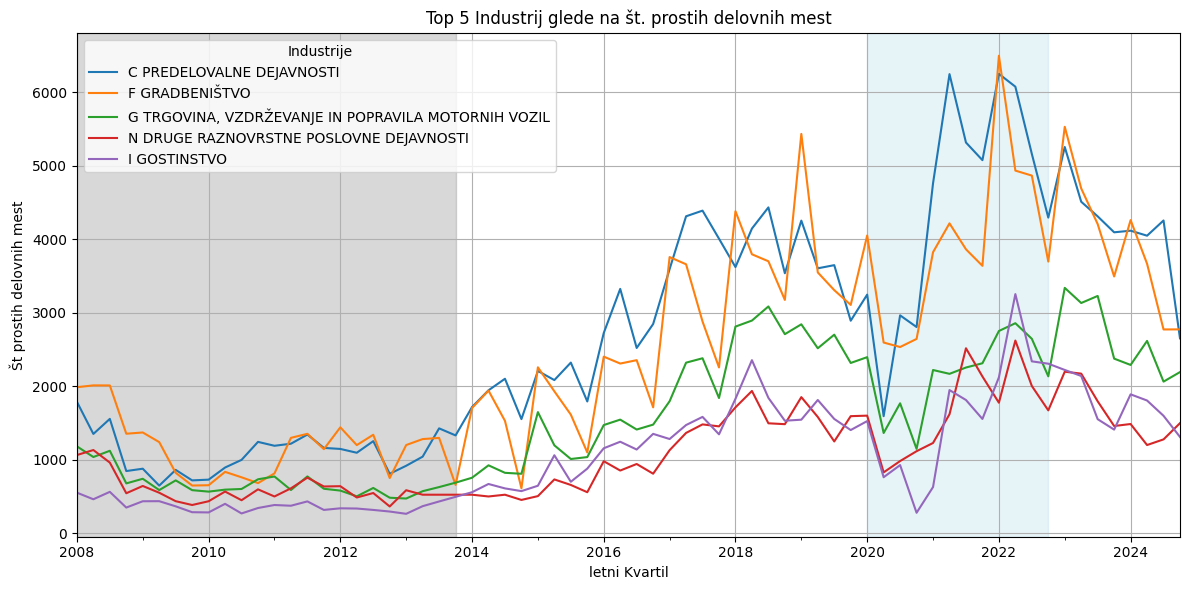

In [123]:
vac_by_industry = delovna_df[
    (delovna_df["MERITVE"] == "Število prostih delovnih mest  - SKUPAJ") &
    (delovna_df["SKD DEJAVNOST"] != "SKD Dejavnost - SKUPAJ [B do S]")
].copy()

vac_by_industry['ČETRTLETJE'] = pd.PeriodIndex(vac_by_industry['ČETRTLETJE'], freq='Q').to_timestamp()

vac_by_industry["DATA"] = pd.to_numeric(vac_by_industry["DATA"], errors="coerce")

vacancy_pivot = vac_by_industry.pivot_table(
    index="ČETRTLETJE",
    columns="SKD DEJAVNOST",
    values="DATA"
)

#vacancy_pivot
top_industries = vacancy_pivot.mean().sort_values(ascending=False).head(5).index

vacancy_pivot[top_industries].plot(figsize=(12,6), title="Top 5 Industrij glede na št. prostih delovnih mest")
plt.ylabel("Št prostih delovnih mest")
plt.xlabel("letni Kvartil")
plt.grid(True)
plt.legend(title="Industrije")
plt.axvspan('2008-01-01', '2013-12-31', color='gray', alpha=0.3, label='Kriza 2008')
plt.axvspan('2020-01-01', '2022-12-31', color='lightblue', alpha=0.3, label='COVID-19')
plt.tight_layout()
plt.show()


Multilingual PX file
SPOL        Spol - SKUPAJ
ČETRTLETJE               
2008-01-01            5.1
2008-04-01            4.2
2008-07-01            4.1
2008-10-01            4.3
2009-01-01            5.4
...                   ...
2023-10-01            3.4
2024-01-01            3.4
2024-04-01            3.4
2024-07-01            4.4
2024-10-01            3.5

[68 rows x 1 columns]
SKD DEJAVNOST  B RUDARSTVO  C PREDELOVALNE DEJAVNOSTI  \
ČETRTLETJE                                              
2008-01-01          3639.0                   213496.0   
2008-04-01          3569.0                   213478.0   
2008-07-01          3499.0                   211647.0   
2008-10-01          3423.0                   208497.0   
2009-01-01          3355.0                   198980.0   
...                    ...                        ...   
2023-10-01          2146.0                   199781.0   
2024-01-01          2113.0                   198466.0   
2024-04-01          2092.0                   197

C:\Users\lejko\AppData\Local\Temp\ipykernel_16204\1709020128.py:53: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


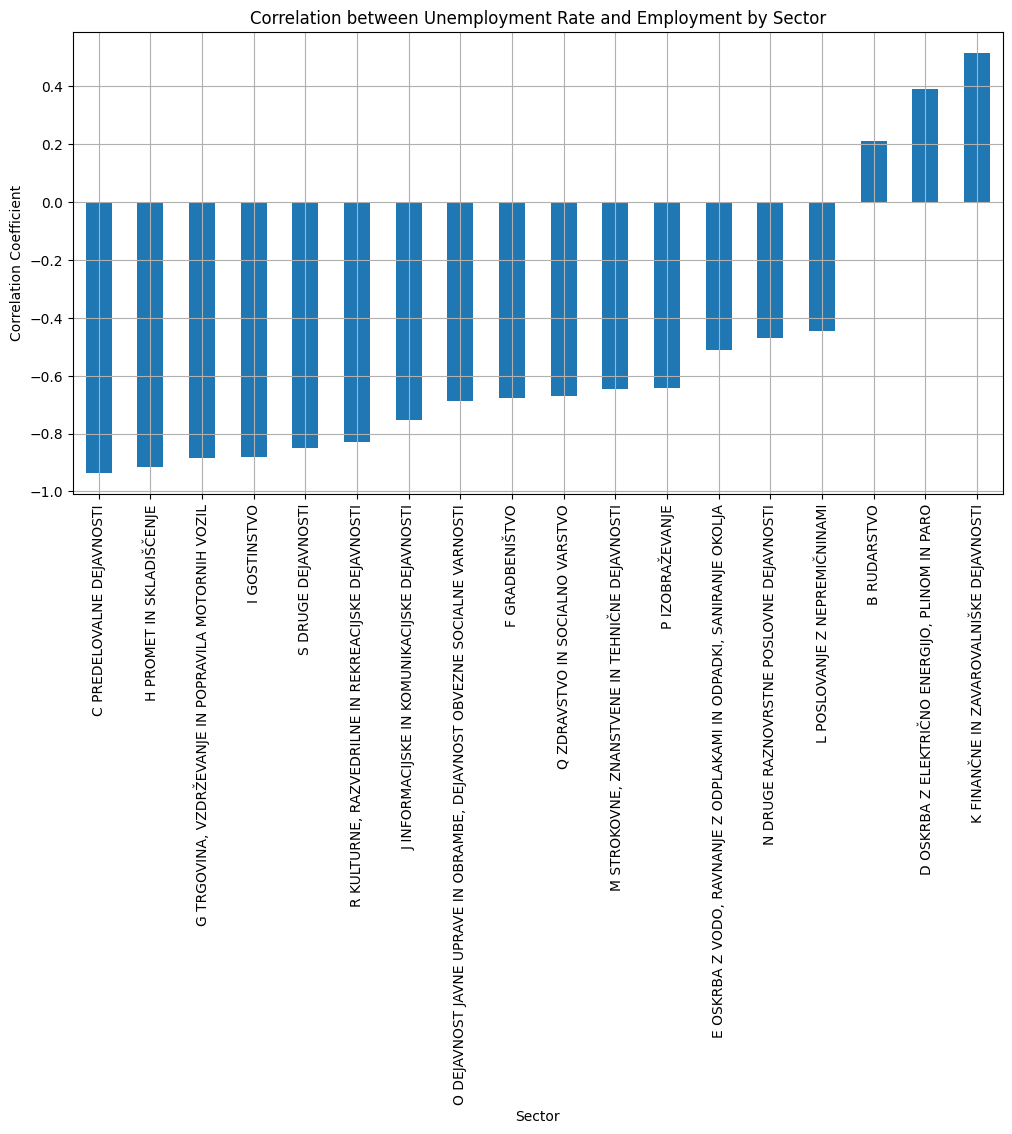

In [117]:
vsa_delovna = delovna_df[
    (delovna_df["MERITVE"] == 'Število zasedenih delovnih mest - SKUPAJ') &
    (delovna_df["SKD DEJAVNOST"] != "SKD Dejavnost - SKUPAJ [B do S]")
].copy()

vsa_delovna['ČETRTLETJE'] = pd.PeriodIndex(vsa_delovna['ČETRTLETJE'], freq='Q').to_timestamp()

vsa_delovna["DATA"] = pd.to_numeric(vsa_delovna["DATA"], errors="coerce")

delovna_pivot = vsa_delovna.pivot_table(
    index="ČETRTLETJE",
    columns="SKD DEJAVNOST",
    values="DATA"
)

parsed2 = pyaxis.parse('podatki/vsi.px', encoding='cp1250')
df2 = parsed2['DATA']

df2_unemployment = df2[
    (df2['KOHEZIJSKA REGIJA'] == "SLOVENIJA") &
    (df2["STAROSTNA SKUPINA"] == "Starostna skupina - SKUPAJ") &
    (df2["MERITVE"] == "Stopnja brezposelnosti (v %)") &
    (df2["SPOL"] == "Spol - SKUPAJ")
].copy()



df2_unemployment['ČETRTLETJE'] = pd.PeriodIndex(df2_unemployment['ČETRTLETJE'], freq='Q').to_timestamp()
df2_unemployment['DATA'] = pd.to_numeric(df2_unemployment['DATA'], errors='coerce')

pivot = df2_unemployment.pivot_table(index='ČETRTLETJE', columns='SPOL', values='DATA')


print(pivot)
print(delovna_pivot)


aligned_df = pd.concat([pivot, delovna_pivot], axis=1, join='inner')

# Calculate correlations between unemployment rate and employment in each sector
correlations = aligned_df.corr().iloc[0, 1:]  # Assuming unemployment rate is the first column

# Sort correlations to find sectors most affected
sorted_correlations = correlations.sort_values()

print(sorted_correlations)

# Plot the correlations
sorted_correlations.plot(kind='bar', figsize=(12, 6), title='Correlation between Unemployment Rate and Employment by Sector')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Sector')
plt.grid(True)
plt.tight_layout()
plt.show()



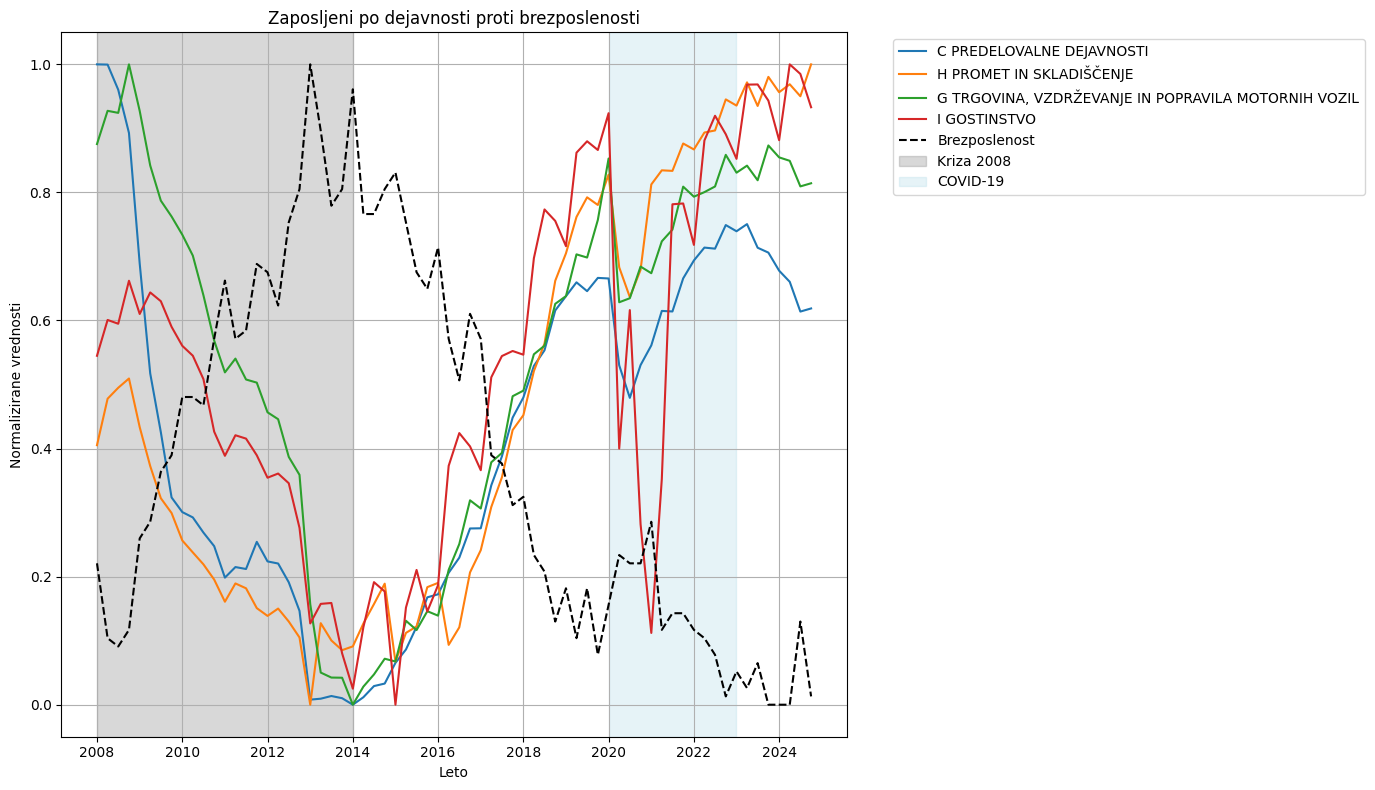

In [126]:
employment_df_normalized = delovna_pivot.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

unemployment_rate_normalized = (pivot['Spol - SKUPAJ'] - pivot['Spol - SKUPAJ'].min()) / (pivot['Spol - SKUPAJ'].max() - pivot['Spol - SKUPAJ'].min())

plt.figure(figsize=(14, 8))

for sector in sorted_correlations.head(4).index:
    plt.plot(employment_df_normalized.index, employment_df_normalized[sector], label=sector)

plt.plot(unemployment_rate_normalized.index, unemployment_rate_normalized, label='Brezposlenost', linestyle='--', color='black')

plt.title('Zaposljeni po dejavnosti proti brezposlenosti')
plt.xlabel('Leto')
plt.ylabel('Normalizirane vrednosti')
plt.axvspan('2008-01-01', '2013-12-31', color='gray', alpha=0.3, label='Kriza 2008')
plt.axvspan('2020-01-01', '2022-12-31', color='lightblue', alpha=0.3, label='COVID-19')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()